# Wikidata predicate distribution analysis

In this notebook we'll analyse how wikidata properties are distributed. We will try to investigate the property distribution of some towns and possibly other entities

In [1]:
from tools.datasets import *
import numpy as np
import pandas as pd

glasgow_truthy_dict = fetch_dataset("Q4093", provider="wikidata", flavor="simple")

Dataset Q4093.json already downloaded. Skipping...


In [2]:
predicates = glasgow_truthy_dict["entities"]["Q4093"]["claims"]

print(predicates.keys())

dict_keys(['P190', 'P131', 'P373', 'P227', 'P17', 'P94', 'P281', 'P421', 'P473', 'P300', 'P625', 'P31', 'P613', 'P910', 'P948', 'P982', 'P646', 'P1082', 'P901', 'P1036', 'P856', 'P1464', 'P1465', 'P1566', 'P1740', 'P1792', 'P605', 'P206', 'P935', 'P214', 'P47', 'P1997', 'P2633', 'P1281', 'P242', 'P2046', 'P1343', 'P1255', 'P268', 'P906', 'P998', 'P2468', 'P1617', 'P3616', 'P3120', 'P3417', 'P2347', 'P1225', 'P3219', 'P4527', 'P1549', 'P6', 'P2716', 'P1889', 'P5573', 'P949', 'P4672', 'P1151', 'P1667', 'P18', 'P1830', 'P1376', 'P244', 'P1705', 'P1448', 'P2936', 'P1296', 'P691', 'P6766', 'P6849', 'P7350', 'P836', 'P7867', 'P7818', 'P7829', 'P7827', 'P7832', 'P7859', 'P7959', 'P1417', 'P6404'])


In [3]:


def get_edges(entity_df, entities_only=True):
    """Generate triples: [<subject>, <predicate>, <object>].
        Only consider objects for which there is a linked entity
        
        If entities_only is True, consider the triples where the objects are wikidata entities.
    """
    
    root = entity_df["entities"]
    subjects = list(entity_df["entities"].keys())
    
    predicates = [(subject, claim, root[subject]["claims"][claim]) for subject in subjects for claim in root[subject]["claims"]]

    tuples = []
    
    for (subject, claim, snaks) in predicates:
        for snak in snaks:
            mainsnak = snak["mainsnak"]
            if mainsnak["snaktype"] == "value":
                datavalue = mainsnak["datavalue"]
                datavalue_value = datavalue["value"]
                datavalue_type = datavalue["type"]     
                
                if datavalue_type == "wikibase-entityid":
                    obj_to_append = datavalue_value["id"]
                elif entities_only:
                    continue
                elif datavalue_type == "string":
                    obj_to_append = datavalue_value
                else:
                    obj_to_append = None
                
                if obj_to_append:
                    tuples.append((subject, claim, obj_to_append))
            else:
                print("snaktype != value", mainsnak["snaktype"])
            
    
    return tuples

edges = get_edges(glasgow_truthy_dict)
for edge in edges:
    print(edge)

('Q4093', 'P190', 'Q5776')
('Q4093', 'P190', 'Q2090')
('Q4093', 'P190', 'Q23482')
('Q4093', 'P190', 'Q908')
('Q4093', 'P190', 'Q495')
('Q4093', 'P190', 'Q1563')
('Q4093', 'P190', 'Q11739')
('Q4093', 'P190', 'Q216479')
('Q4093', 'P131', 'Q55934339')
('Q4093', 'P131', 'Q68826097')
('Q4093', 'P131', 'Q77606319')
('Q4093', 'P131', 'Q77607750')
('Q4093', 'P17', 'Q145')
('Q4093', 'P17', 'Q174193')
('Q4093', 'P17', 'Q161885')
('Q4093', 'P17', 'Q230791')
('Q4093', 'P421', 'Q6574')
('Q4093', 'P31', 'Q515')
('Q4093', 'P31', 'Q1549591')
('Q4093', 'P910', 'Q6789903')
('Q4093', 'P1464', 'Q8050662')
('Q4093', 'P1465', 'Q9218504')
('Q4093', 'P1740', 'Q8458102')
('Q4093', 'P1792', 'Q6791290')
('Q4093', 'P206', 'Q19721')
('Q4093', 'P206', 'Q183161')
('Q4093', 'P47', 'Q2746326')
('Q4093', 'P47', 'Q209142')
('Q4093', 'P2633', 'Q5535147')
('Q4093', 'P1343', 'Q4114391')
('Q4093', 'P1343', 'Q4173137')
('Q4093', 'P1343', 'Q19180675')
('Q4093', 'P1343', 'Q602358')
('Q4093', 'P6', 'Q29973504')
('Q4093', 'P1889

In [4]:
results_df = wikidata_sparql.run_query("""
SELECT ?label
WHERE
{
    wd:Q4093 rdfs:label ?label.
    FILTER(LANG(?label) = "en").
}
""")

In [5]:
results_df[['label.value']].head()

,label.value
0,Glasgow


In [7]:
# let's generalize
annotate_wikidata_property(["P6", "P10"])


,property.type,property.value,propertyLabel.xml:lang,propertyLabel.type,propertyLabel.value
0,uri,http://www.wikidata.org/entity/P6,en,literal,head of government
1,uri,http://www.wikidata.org/entity/P10,en,literal,video


In [8]:
import pandas as pd
edges_df = pd.DataFrame(edges, columns=["subject", "predicate", "object"])

In [9]:
edges_df.groupby("predicate")["object"].count().to_dict()

{'P1151': 1,
 'P131': 4,
 'P1343': 4,
 'P1376': 3,
 'P1464': 1,
 'P1465': 1,
 'P17': 4,
 'P1740': 1,
 'P1792': 1,
 'P1830': 2,
 'P1889': 1,
 'P190': 8,
 'P206': 2,
 'P2633': 1,
 'P2936': 1,
 'P31': 2,
 'P421': 1,
 'P47': 2,
 'P6': 1,
 'P7867': 1,
 'P7959': 3,
 'P910': 1}

In [10]:
property_list = edges_df["predicate"].unique()
properties = annotate_wikidata_property(property_list)

In [11]:
properties["predicate"] = properties["property.value"].str[len("http://www.wikidata.org/entity/"):]

In [12]:
annotated_edges = edges_df.merge(properties, left_on="predicate", right_on="predicate")

annotated_edges[["subject", "predicate", "propertyLabel.value"]]

,subject,predicate,propertyLabel.value
0,Q4093,P190,twinned administrative body
1,Q4093,P190,twinned administrative body
2,Q4093,P190,twinned administrative body
3,Q4093,P190,twinned administrative body
4,Q4093,P190,twinned administrative body
5,Q4093,P190,twinned administrative body
6,Q4093,P190,twinned administrative body
7,Q4093,P190,twinned administrative body
8,Q4093,P131,located in the administrative territorial entity
9,Q4093,P131,located in the administrative territorial entity


In [13]:
annotated_edges[["propertyLabel.value", "object"]].groupby("propertyLabel.value").count().to_dict()["object"]

{'capital of': 3,
 'category for films shot at this location': 1,
 'category for maps': 1,
 'category for people born here': 1,
 'category for people who died here': 1,
 'category of associated people': 1,
 'country': 4,
 'described by source': 4,
 'different from': 1,
 'geography of topic': 1,
 'head of government': 1,
 'historic county': 3,
 'instance of': 2,
 'language used': 1,
 'located in or next to body of water': 2,
 'located in the administrative territorial entity': 4,
 'located in time zone': 1,
 'owner of': 2,
 'shares border with': 2,
 "topic's main Wikimedia portal": 1,
 "topic's main category": 1,
 'twinned administrative body': 8}

In [14]:
glasgow_property_distribution = annotated_edges.pivot_table(index=['subject', 'predicate', 'propertyLabel.value'], aggfunc='size')
print(glasgow_property_distribution)

subject  predicate  propertyLabel.value                             
Q4093    P1151      topic's main Wikimedia portal                       1
         P131       located in the administrative territorial entity    4
         P1343      described by source                                 4
         P1376      capital of                                          3
         P1464      category for people born here                       1
         P1465      category for people who died here                   1
         P17        country                                             4
         P1740      category for films shot at this location            1
         P1792      category of associated people                       1
         P1830      owner of                                            2
         P1889      different from                                      1
         P190       twinned administrative body                         8
         P206       located in or next to b

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a6a0febd0>],
      dtype=object)

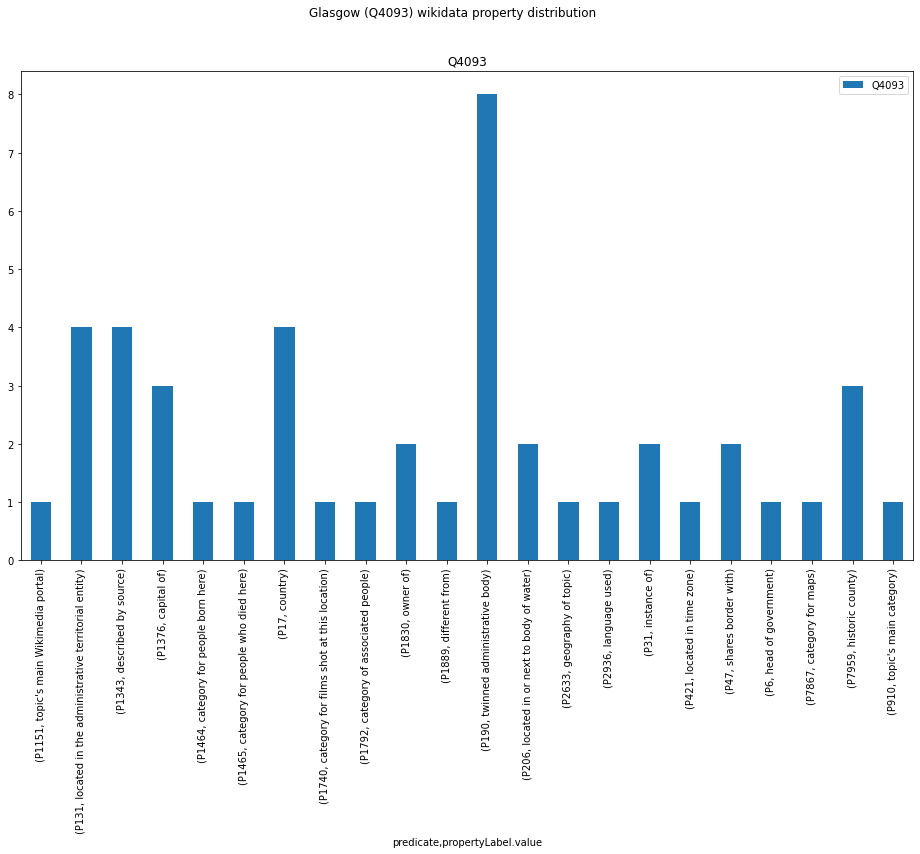

In [15]:
glasgow_property_distribution.unstack(level=0).plot(kind='bar', subplots=True, title="Glasgow (Q4093) wikidata property distribution", figsize=(16, 9))

In [16]:
def strip_prefix(prefix, string):
    if string.startswith(prefix):
        return string[len(prefix):]
    return string

def find_wikidata_entity(entity_str):
    query = """SELECT ?entity
    WHERE
    {
        ?entity rdfs:label|skos:altLabel "?entity_str"@en.
    }
    
    LIMIT 1
    """.replace("?entity_str", entity_str)
    
    result = wikidata_sparql.run_query(query)["entity.value"][0]
    
    return strip_prefix("http://www.wikidata.org/entity/", result)

find_wikidata_entity("Glasgow")

'Q8721'

In [17]:
find_wikidata_entity("Philadelphia")

'Q138280'

In [35]:
def get_entities_distribution(entities):
    # Merge the edge lists for each entity dataframe
    wikidata_truthy_dfs = [fetch_dataset(entity, provider="wikidata", flavor="simple") for entity in entities]
    edges_list = [get_edges(df) for df in wikidata_truthy_dfs]
    edges = [edge for edges in edges_list for edge in edges]
    edges_df = pd.DataFrame(edges, columns=["subject", "predicate", "object"])
    
    # Annotate the properties
    property_list = edges_df["predicate"].unique()
    annotated_properties = annotate_wikidata_property(property_list)
    
    # Merge edge list and annotations.
    annotated_properties["predicate"] = annotated_properties["property.value"].str[len("http://www.wikidata.org/entity/"):]
    annotated_edges = edges_df.merge(annotated_properties, left_on="predicate", right_on="predicate")
    
    # Count duplicate s-o pairs
    property_distribution = annotated_edges.pivot_table(index=['subject', 'predicate', 'propertyLabel.value'], aggfunc='size')
    
    for key, val in property_distribution.unstack(level=0).to_dict().items():
        print(key)
        # strip out the NaN's made during merging while printing
        print(dict((k, v) for k, v in val.items() if not np.isnan(v)))
    
    return property_distribution

def plot_distribution(property_distribution, legend=None, *args, **kwargs):
    """
    Plot a distribution of one or more entities in the same plot.
    
    args:
    
    - property_distribution: a result of get_entities_distribution
    - legend: dict of str: if provided, replace the default legend with a custom one in the format
        (description:entity). The key is the entity, the value is the wished description. 
    
    The rest of the arguments are the same of DataFrame.plot().
    """
    
    if "figsize" not in kwargs:
        kwargs["figsize"] = (30, 9)
        
    ax = property_distribution.unstack(level=0).plot(kind='bar', *args, **kwargs)
    
    if legend:      
        used_entities = property_distribution.index.get_level_values(0).unique()
        full_names = [f"{legend[entity]}:{entity}" for entity in used_entities]
        
        # In case of subplots ax is an ndarray of axes
        if not "subplots" in kwargs:
            ax.legend(full_names)
        else:
            for entity, ax_ in zip(used_entities, ax):
                ax_.set_title(legend[entity])

Dataset Q8721.json already downloaded. Skipping...
Dataset Q138280.json already downloaded. Skipping...
Dataset Q2656.json already downloaded. Skipping...
Q138280
{('P131', 'located in the administrative territorial entity'): 1.0, ('P1343', 'described by source'): 3.0, ('P1464', 'category for people born here'): 1.0, ('P17', 'country'): 1.0, ('P1792', 'category of associated people'): 1.0, ('P31', 'instance of'): 1.0, ('P421', 'located in time zone'): 1.0, ('P47', 'shares border with'): 7.0, ('P793', 'significant event'): 1.0, ('P910', "topic's main category"): 1.0}
Q2656
{('P131', 'located in the administrative territorial entity'): 2.0, ('P1313', 'office held by head of government'): 1.0, ('P1343', 'described by source'): 7.0, ('P1376', 'capital of'): 4.0, ('P1464', 'category for people born here'): 1.0, ('P1465', 'category for people who died here'): 1.0, ('P150', 'contains administrative territorial entity'): 1.0, ('P17', 'country'): 3.0, ('P1740', 'category for films shot at this 

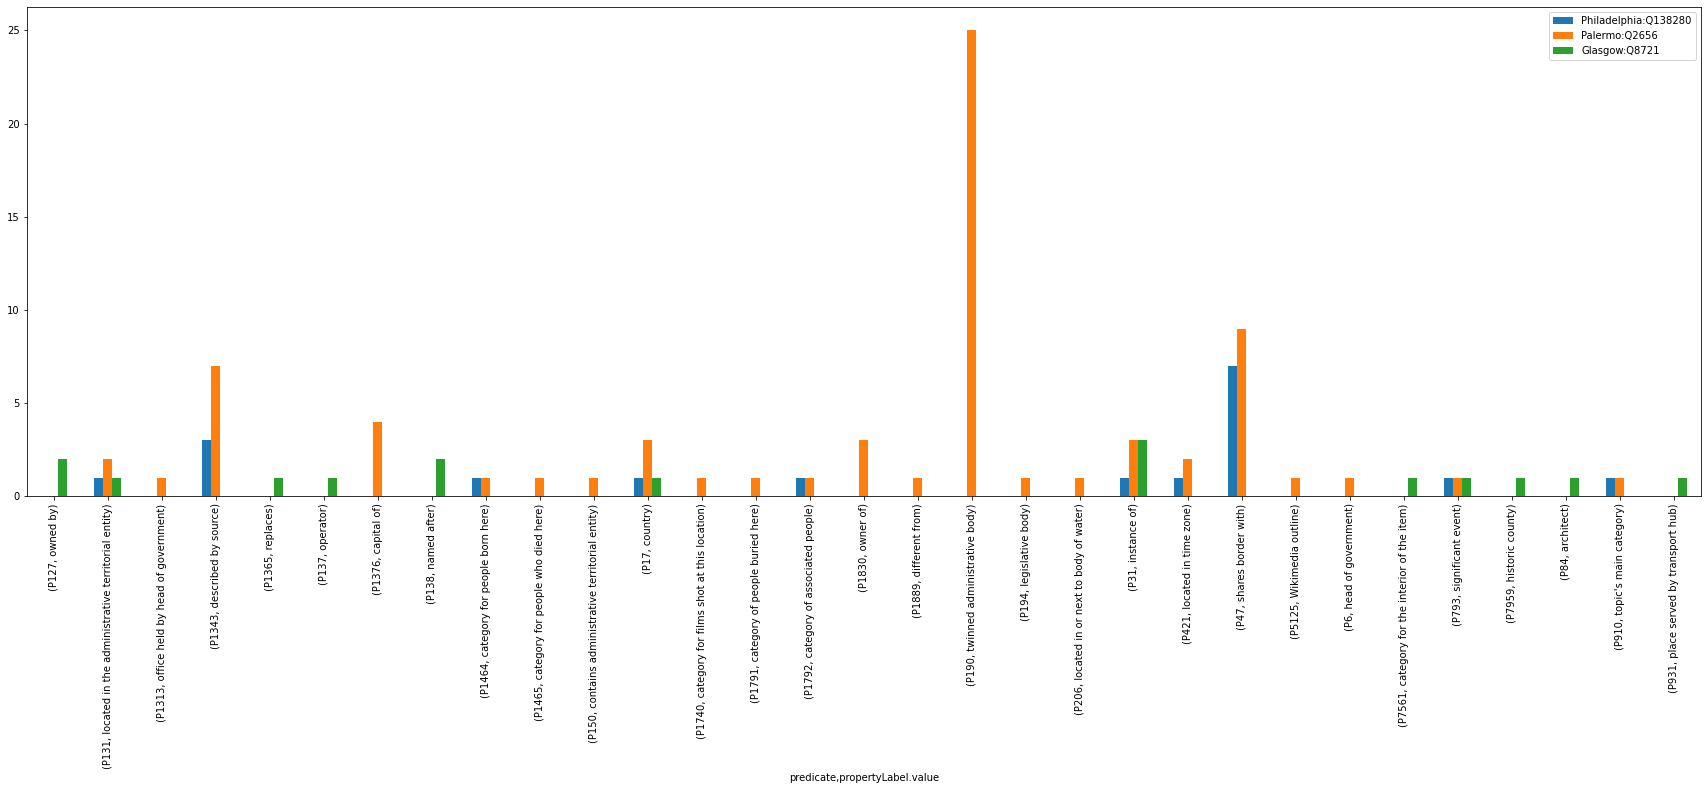

In [36]:
towns = ["Glasgow", "Philadelphia", "Palermo"]
town_entities = {find_wikidata_entity(town):town for town in towns}

plot_distribution(get_entities_distribution(town_entities.keys()), legend=town_entities)

## Improved query system

We need to test against words that may have multiple meanings and thus require entity linking.

I tried with a pre-trained word2vec embedding model, with scarse results. Then I moved on to S-BERT.

In [22]:
!pip install -U sentence-transformers

Requirement already up-to-date: sentence-transformers in /opt/conda/lib/python3.7/site-packages (0.2.6.2)


In [23]:
from sentence_transformers import SentenceTransformer
from scipy.spatial import distance

model = SentenceTransformer('bert-base-nli-mean-tokens')
sentences = ["city in Scotland", "town in Montana", "Scottish parish", "Amtrak station in Glasgow, Montana, United States of America", ""]

sentence_embeddings = model.encode(sentences)
query = model.encode(["Scottish city"])

for embedding in sentence_embeddings:
    print(1 - distance.cosine(embedding, query))

0.9366812705993652
0.48034125566482544
0.8854820132255554
0.4521092176437378
0.5092676877975464


In [24]:
query = model.encode(["church"])

for embedding in sentence_embeddings:
    print(1 - distance.cosine(embedding, query))

0.4166299104690552
0.3467281460762024
0.48753616213798523
0.3062305748462677
0.48276686668395996


In [25]:
def find_all_results(label):
    query = """
    SELECT ?entity ?entityDescription
    WHERE
    {
        ?entity rdfs:label|skos:altLabel "?label"@en.
        SERVICE wikibase:label
        {
            bd:serviceParam wikibase:language "en" .
        }
    }
    """.replace("?label", label)
    
    return wikidata_sparql.run_query(query)

def find_most_related_entity(label, descriptions):
    """
    Find a list of related entities that match the given descriptions.
    This method uses a language model to disambiguate between different results.
    
    descriptions can be either a single string or an iterable of strings. In the latter case, the function
    will return a list of matching entities with the given order.
    """
    descriptions_as_list = not isinstance(descriptions, str)
    
    if not descriptions_as_list:
        descriptions = [descriptions]
    
    results = find_all_results(label)
    result_list = np.append(results["entityDescription.value"].to_numpy(na_value=""), descriptions)
    
    # Get S-BERT
    embeddings = model.encode(result_list)
    embeddings_np = np.array((embeddings))
    embeddings_normalized = embeddings_np / np.linalg.norm(embeddings, axis=1).reshape(-1, 1)    
    embedding_results, embedding_queries = embeddings_normalized[:-len(descriptions)] , embeddings_normalized[-len(descriptions):]
    
    # perform cosine similarity between all the queries and all the given descriptions
    # I can't find a way to make this vectorized, but should not be a concern.
    correlation_scores = [query.dot(embedding_results.T) for query in embedding_queries]
    correlation_scores = np.stack(correlation_scores)
    
    # Match the queries with the entities based on maximum cosine similarity
    preferred = np.argmax(correlation_scores, axis=1)
    result =  [strip_prefix("http://www.wikidata.org/entity/",
                            results.iloc[idx]["entity.value"]) for idx in preferred]
    
    return result

In [26]:
class Entity:
    def __init__(self, name, queries):
        self.name = name
        self.queries = queries
        self.entities = find_most_related_entity(name, queries)
        self.legend = self._get_legend()
    
    def calculate_distribution(self):
        self.distribution = get_entities_distribution(self.entities)
        
    def _get_legend(self):
        if isinstance(self.queries, str):
            queries = [self.queries]
        else:
            queries = self.queries
        
        return {entity:f"{self.name}({query})"
                    for entity, query in zip(self.entities, queries)}
    
    def plot(self):
        plot_distribution(self.distribution, legend=self.legend, title=self.name)

Dataset Q8436.json already downloaded. Skipping...
Dataset Q35409.json already downloaded. Skipping...
Q35409
{('P1343', 'described by source'): 2.0, ('P1889', 'different from'): 3.0, ('P31', 'instance of'): 3.0, ('P361', 'part of'): 5.0, ('P910', "topic's main category"): 1.0}
Q8436
{('P1343', 'described by source'): 6.0, ('P1424', "topic's main template"): 2.0, ('P1542', 'has effect'): 1.0, ('P1552', 'has quality'): 2.0, ('P1687', 'Wikidata property'): 2.0, ('P1889', 'different from'): 1.0, ('P279', 'subclass of'): 4.0, ('P5008', 'on focus list of Wikimedia project'): 2.0, ('P527', 'has part'): 4.0, ('P910', "topic's main category"): 1.0}
single ax is of type <class 'matplotlib.axes._subplots.AxesSubplot'>


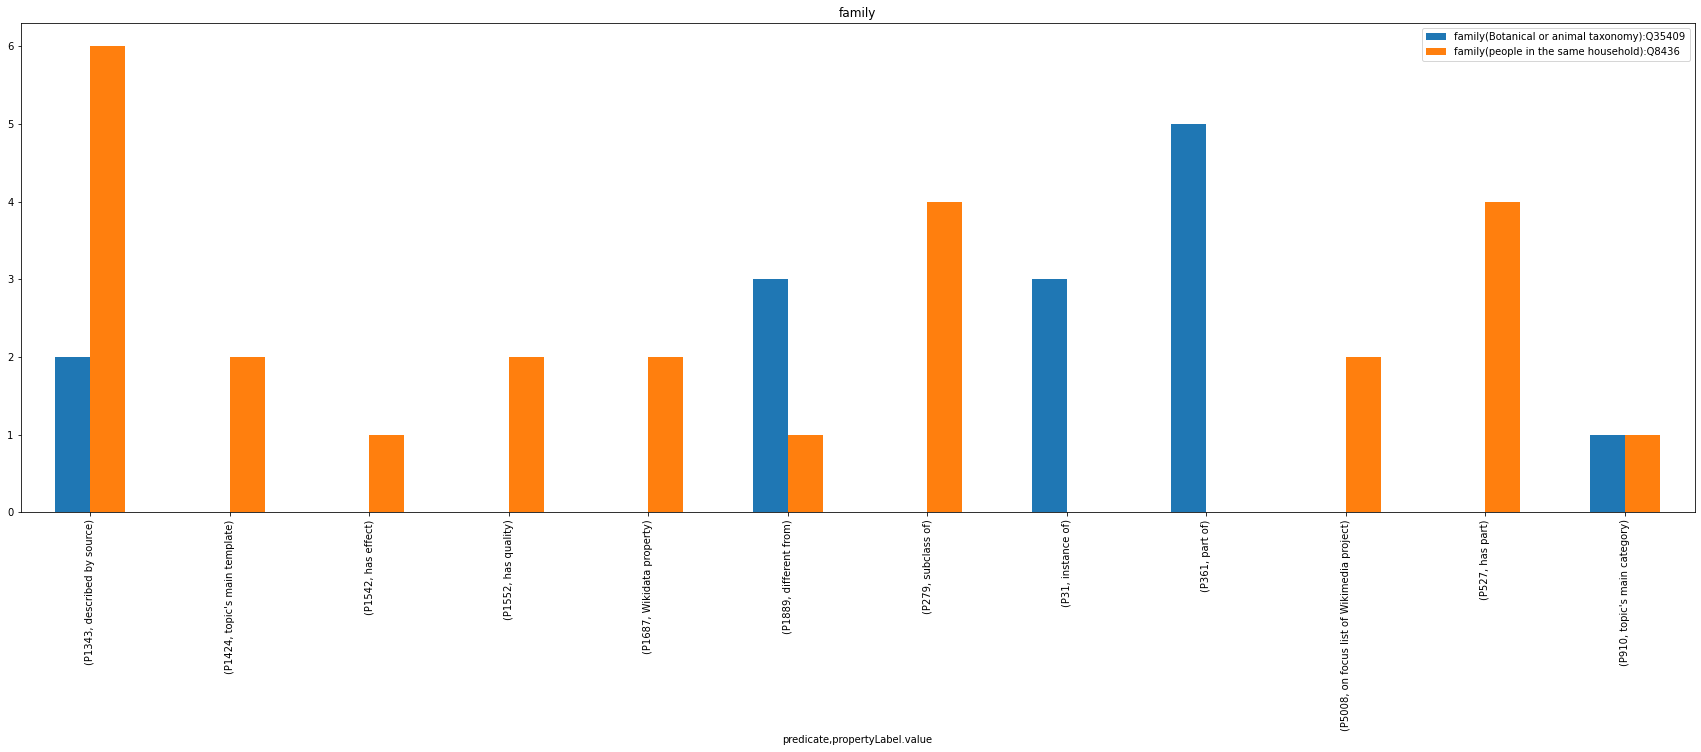

In [27]:
family_entities = Entity("family", ["people in the same household", "Botanical or animal taxonomy"] )
family_entities.calculate_distribution()
family_entities.plot()

Dataset Q847.json already downloaded. Skipping...
Q847
{('P1151', "topic's main Wikimedia portal"): 1, ('P1424', "topic's main template"): 2, ('P1889', 'different from'): 1, ('P2184', 'history of topic'): 1, ('P2283', 'uses'): 3, ('P2354', 'has list'): 1, ('P279', 'subclass of'): 2, ('P3095', 'practiced by'): 4, ('P31', 'instance of'): 1, ('P495', 'country of origin'): 1, ('P5008', 'on focus list of Wikimedia project'): 1, ('P5125', 'Wikimedia outline'): 1, ('P6104', 'maintained by WikiProject'): 1, ('P910', "topic's main category"): 1}
single ax is of type <class 'matplotlib.axes._subplots.AxesSubplot'>


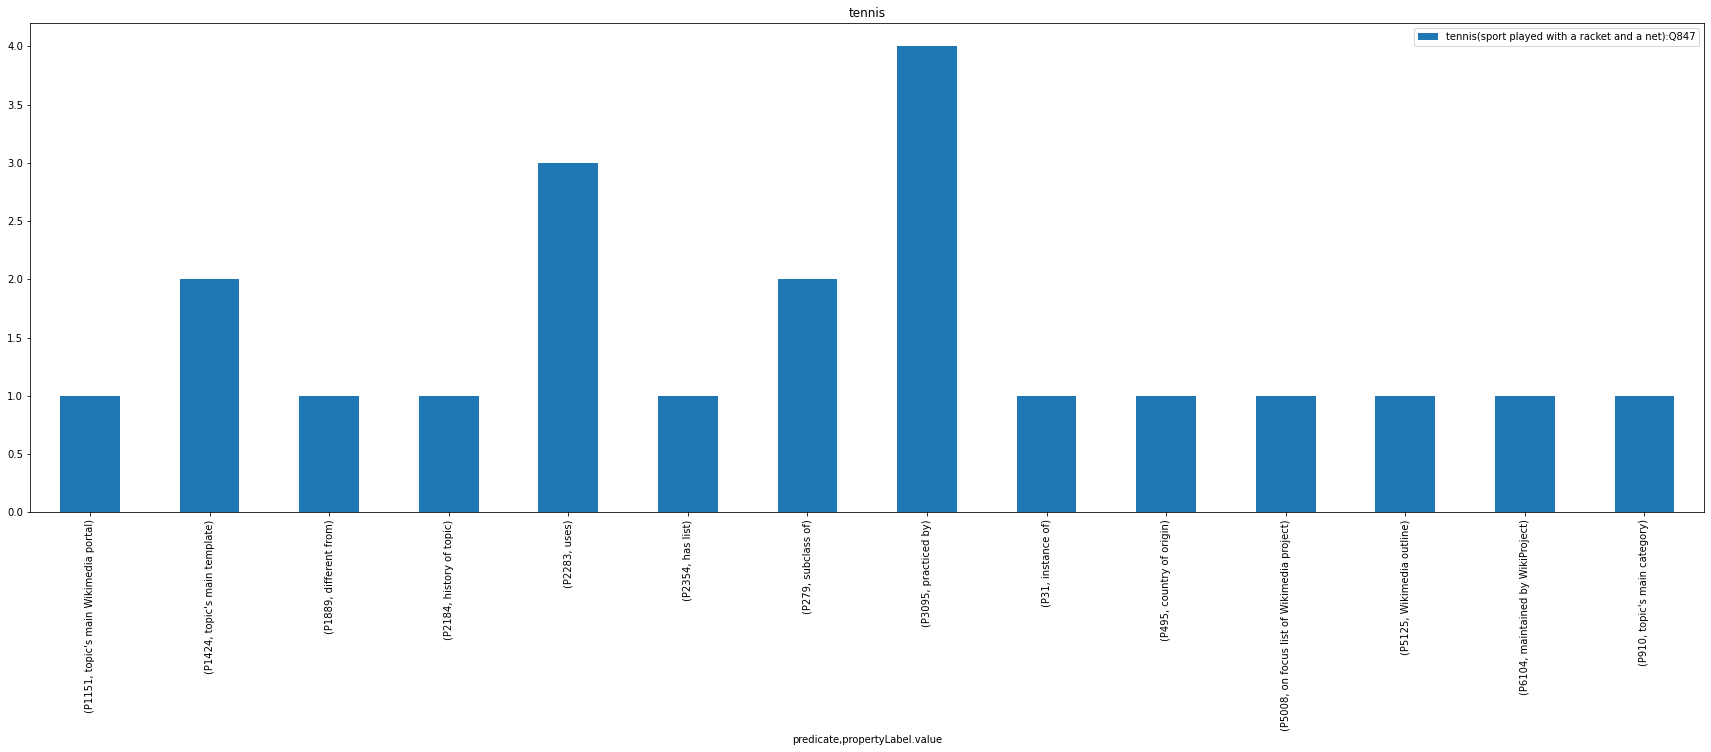

In [28]:
#tennis_entity = find_most_related_entity("tennis", "sport played with a racket and a net")
#tennis_distribution = get_entities_distribution([tennis_entity])
#plot_distribution(tennis_distribution, legend=["tennis"])

tennis_entity = Entity("tennis", "sport played with a racket and a net")
tennis_entity.calculate_distribution()
tennis_entity.plot()

Dataset Q105674.json already downloaded. Skipping...
Q105674
{('P1343', 'described by source'): 2, ('P1889', 'different from'): 4, ('P279', 'subclass of'): 2, ('P3095', 'practiced by'): 1, ('P31', 'instance of'): 1, ('P361', 'part of'): 1, ('P5125', 'Wikimedia outline'): 1, ('P641', 'sport'): 1, ('P910', "topic's main category"): 1}
single ax is of type <class 'matplotlib.axes._subplots.AxesSubplot'>


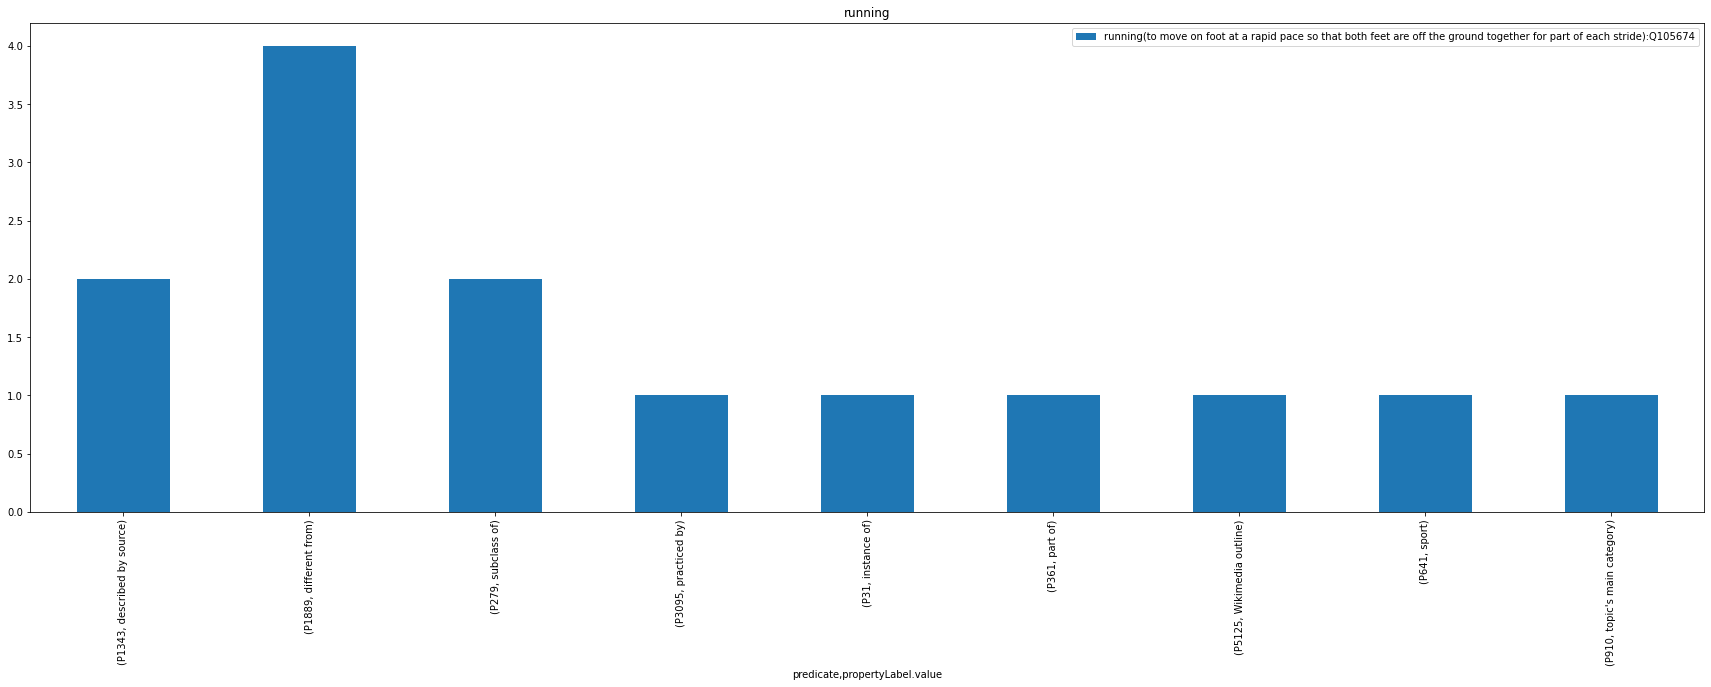

In [29]:
run_entity = Entity("running", "to move on foot at a rapid pace so that both feet are off the ground together for part of each stride")
run_entity.calculate_distribution()
run_entity.plot()

Dataset Q208045.json already downloaded. Skipping...
Q208045
{('P138', 'named after'): 1, ('P279', 'subclass of'): 2, ('P31', 'instance of'): 1, ('P361', 'part of'): 2}
single ax is of type <class 'matplotlib.axes._subplots.AxesSubplot'>


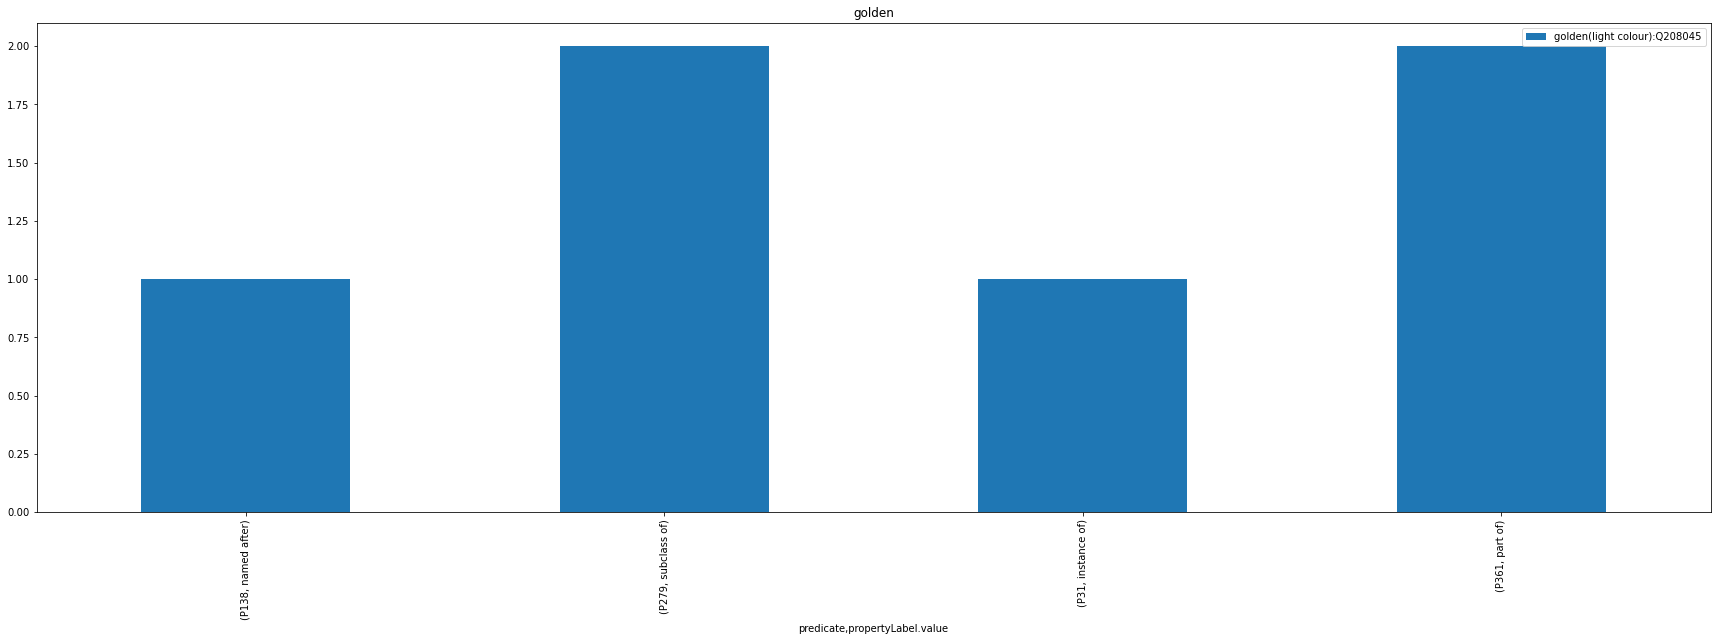

In [30]:
golden_entity = Entity("golden", "light colour")
golden_entity.calculate_distribution()
golden_entity.plot()

Dataset Q193589.json already downloaded. Skipping...
Q193589
{('P1343', 'described by source'): 1, ('P138', 'named after'): 1, ('P31', 'instance of'): 2, ('P910', "topic's main category"): 1}
single ax is of type <class 'matplotlib.axes._subplots.AxesSubplot'>


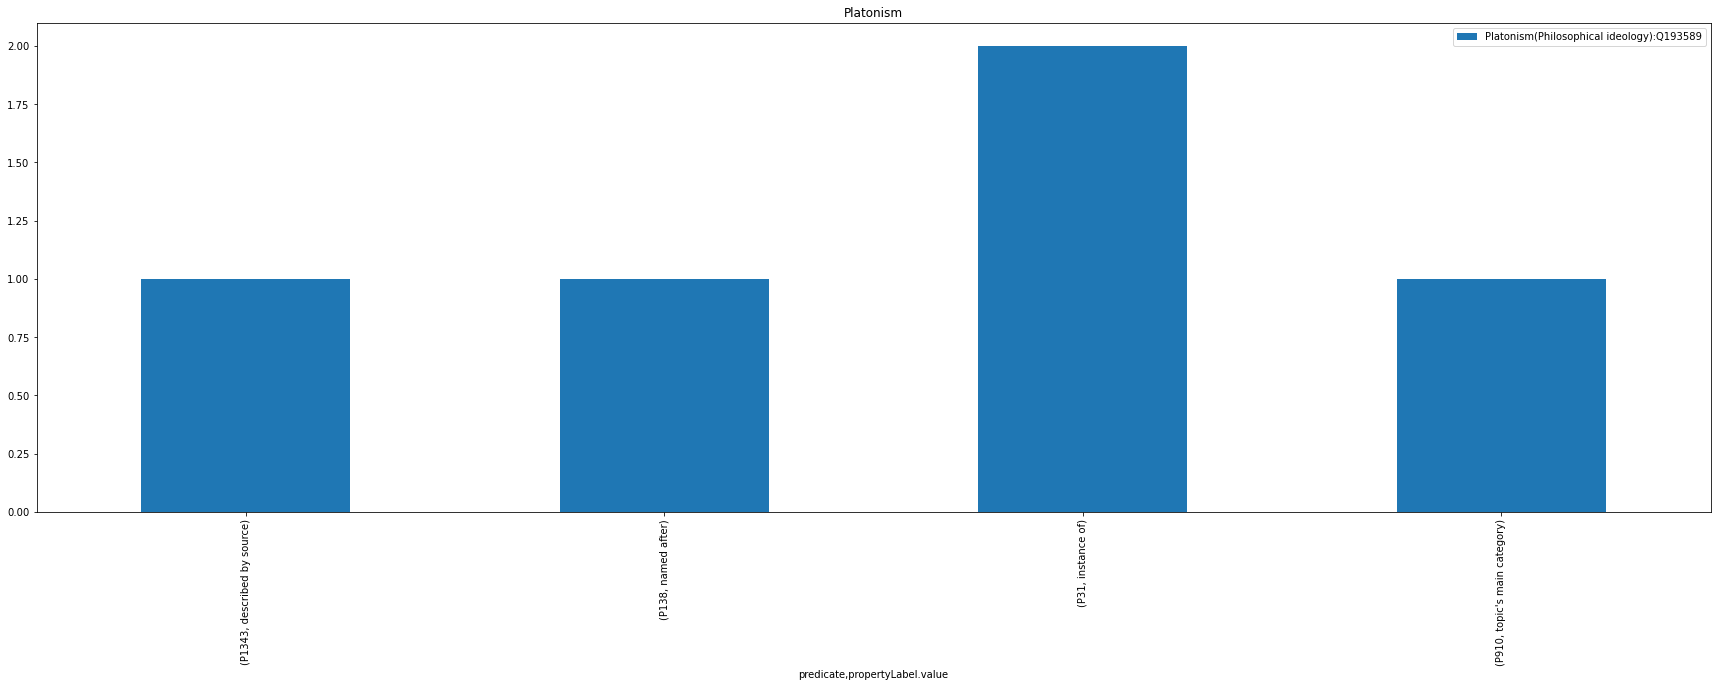

In [31]:
platonism_entity = Entity("Platonism", "Philosophical ideology")
platonism_entity.calculate_distribution()
platonism_entity.plot()

Dataset Q37340.json already downloaded. Skipping...
Dataset Q430728.json already downloaded. Skipping...
Dataset Q41633.json already downloaded. Skipping...
Q37340
{('P1049', 'worshipped by'): 1.0, ('P106', 'occupation'): 1.0, ('P1343', 'described by source'): 14.0, ('P1441', 'present in work'): 4.0, ('P21', 'sex or gender'): 1.0, ('P22', 'father'): 1.0, ('P25', 'mother'): 1.0, ('P26', 'spouse'): 2.0, ('P31', 'instance of'): 2.0, ('P3373', 'sibling'): 2.0, ('P361', 'part of'): 1.0, ('P40', 'child'): 79.0, ('P451', 'unmarried partner'): 45.0, ('P460', 'said to be the same as'): 3.0, ('P551', 'residence'): 1.0, ('P910', "topic's main category"): 1.0}
Q41633
{('P105', 'taxon rank'): 1.0, ('P1343', 'described by source'): 3.0, ('P138', 'named after'): 1.0, ('P141', 'IUCN conservation status'): 1.0, ('P166', 'award received'): 1.0, ('P171', 'parent taxon'): 1.0, ('P31', 'instance of'): 1.0, ('P5841', 'Status in the Red List of Threatened Species in the Czech Republic'): 1.0, ('P910', "topic

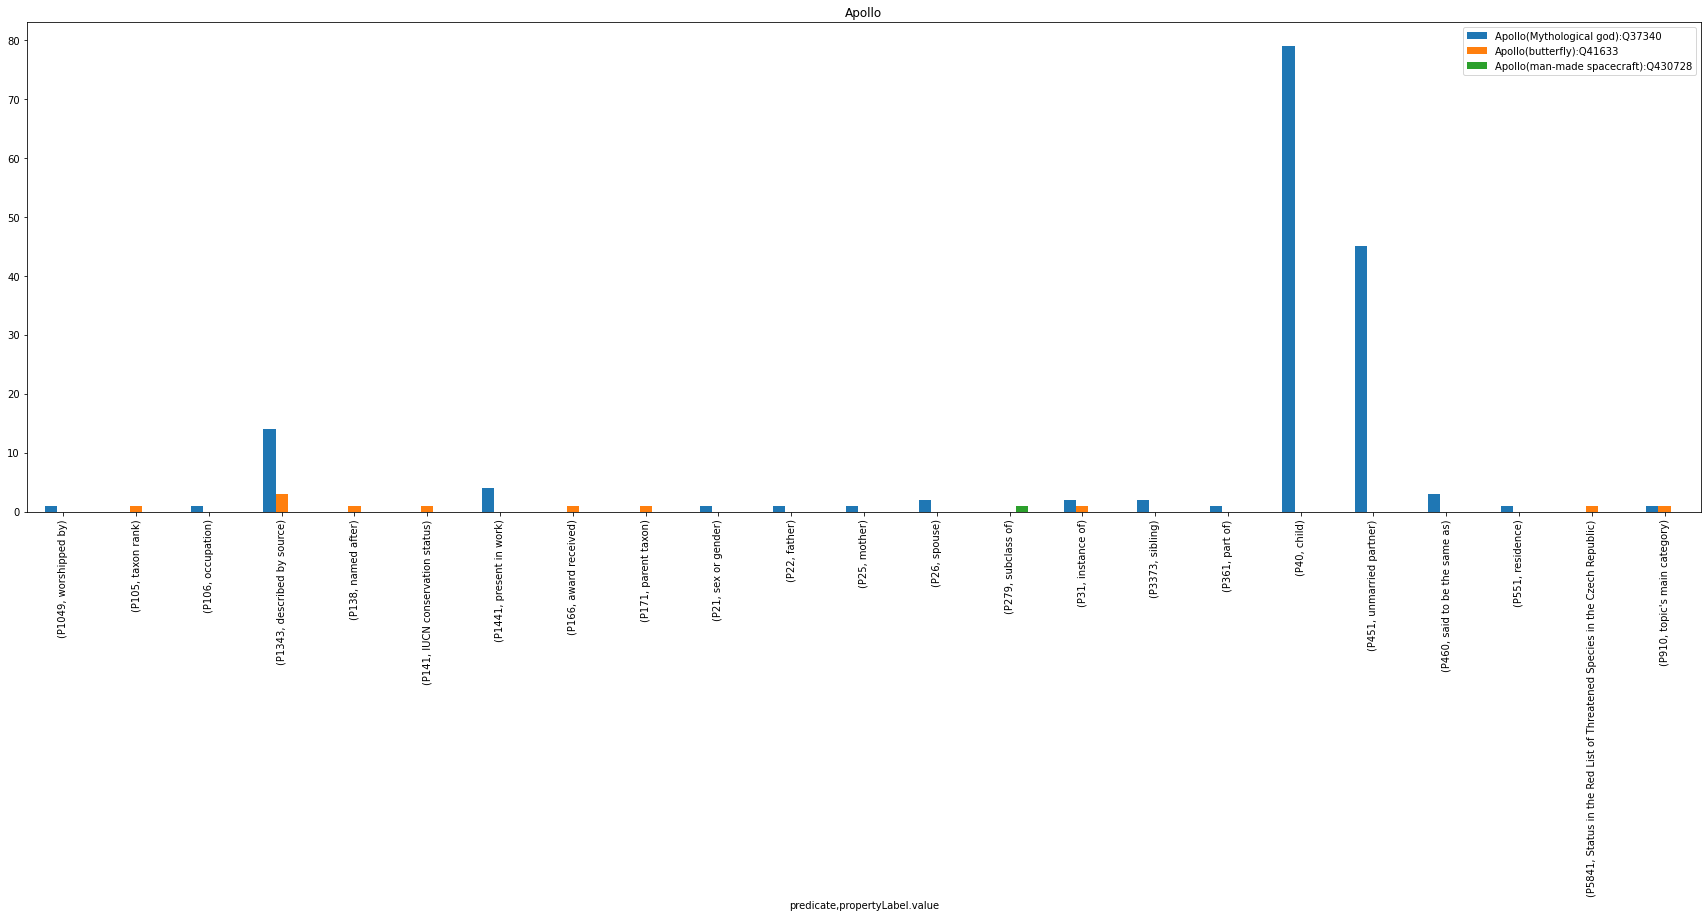

In [32]:
apollo_entities = Entity("Apollo", ["Mythological god", "man-made spacecraft", "butterfly"])
apollo_entities.calculate_distribution()
apollo_entities.plot()

{'Q8436': 'family(people in the same household)', 'Q35409': 'family(Botanical or animal taxonomy)', 'Q847': 'tennis(sport played with a racket and a net)', 'Q105674': 'running(to move on foot at a rapid pace so that both feet are off the ground together for part of each stride)', 'Q208045': 'golden(light colour)', 'Q193589': 'Platonism(Philosophical ideology)', 'Q37340': 'Apollo(Mythological god)', 'Q430728': 'Apollo(man-made spacecraft)', 'Q41633': 'Apollo(butterfly)'}


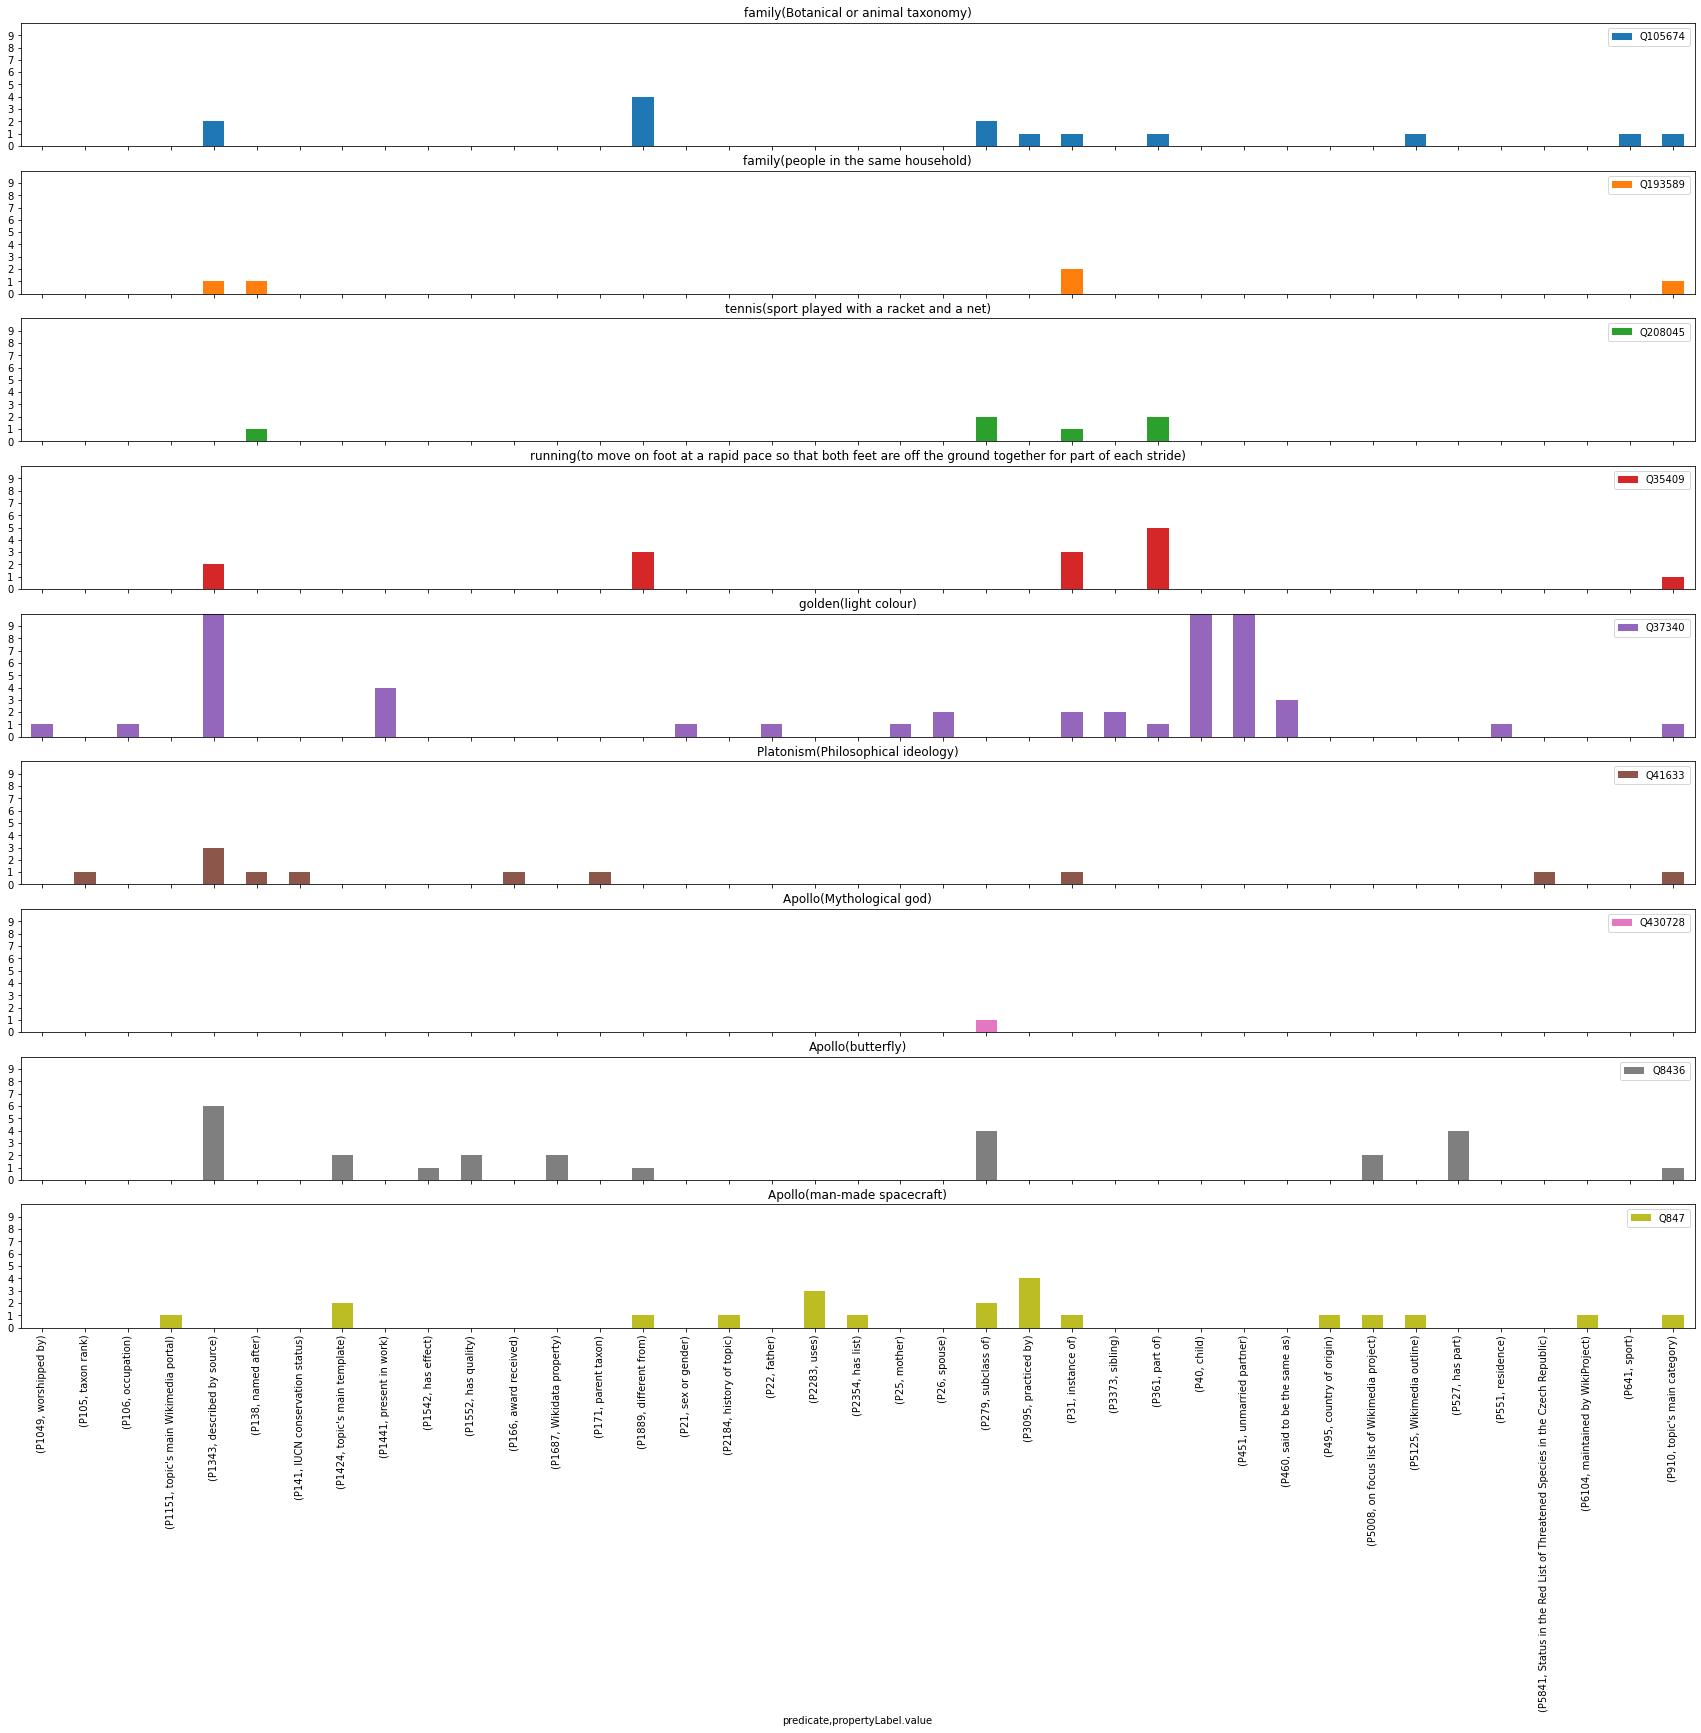

In [39]:
from functools import reduce

def plot_distributions(entities):
    overall_distribution = pd.concat([entity.distribution for entity in entities])
    legend = reduce(lambda a,b: {**a, **b}, map(lambda entity: entity.legend, entities))
    print(legend)
    
    plot_distribution(overall_distribution, legend=legend, subplots=True,
                          figsize=(30, 24), yticks=np.arange(10), ylim=(0, 10))

plot_distributions([family_entities, tennis_entity, run_entity, golden_entity, platonism_entity, apollo_entities])